In [63]:
import numpy as np
import matplotlib.pyplot as plt
from MyML import *

In [166]:
x = [.2,.2]
for i in range(300):
    x.append(.4*x[-1]+.6*x[-2]+np.random.randn())
x = np.array(x)

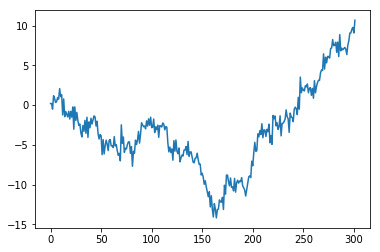

In [168]:
plt.plot(x)

In [169]:
def autocorrelate(x,lag):
    if lag == 0:
        first = x
        last = x
    else:
        first = x[:-lag]
        last = x[(lag):]
    r = np.sum((first - np.mean(x))*(last - np.mean(x)))/np.sum((first - np.mean(x))**2)
    return(r)

In [170]:
correls = []
for i in range(0,31):
    correls.append(autocorrelate(x,i))

<BarContainer object of 31 artists>

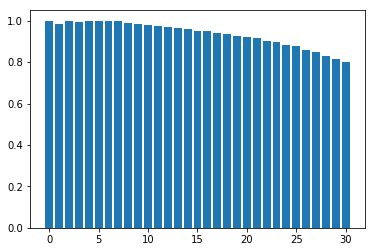

In [171]:
plt.bar(list(range(0,31)),correls)

In [172]:
def PartialAuto(X, lag):
    PACF = [1]
    for k in range(1,lag+1):
        ytk = []
        xtk = []
        for i in range(lag,len(X)):
            ytk.append(X[i])
            xtk.append([X[(i-lag):i]])
        Xtknp = np.array(xtk)
        ytknp = np.array(ytk).reshape(-1,1)
        Xtknpones = np.hstack((np.ones((len(ytk),1)),Xtknp[:,0,:]))
        wtk = np.linalg.inv(Xtknpones.T@Xtknpones)@Xtknpones.T@ytknp
        ytknphat = Xtknpones@wtk
        yt = []
        xt = []
        for j in range(len(X)-lag):
            yt.append(X[j])
            xt.append([X[j+1:j+lag+1]])
        Xtnp = np.array(xt)
        ytnp = np.array(yt).reshape(-1,1)
        Xtnpones = np.hstack((np.ones((len(yt),1)),Xtnp[:,0,:]))
        wt = np.linalg.inv(Xtnpones.T@Xtnpones)@Xtnpones.T@ytnp
        ytnphat = Xtnpones@wt
        PACF.append(np.correlate(np.array((X[:-lag]).reshape(-1,1) - ytnphat).T.tolist()[0],(np.array(X[lag:]).reshape(-1,1) - ytknphat).T.tolist()[0])[0])
    return(PACF)

In [173]:
PACF = PartialAuto(x,20)

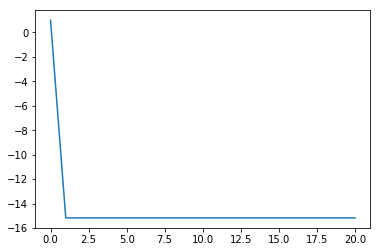

In [174]:
plt.plot(PACF)

In [175]:
import statsmodels.tsa.stattools as st

<BarContainer object of 20 artists>

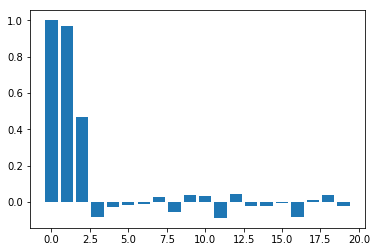

In [176]:
plt.bar(list(range(20)),st.pacf(x, nlags = 19))